Anomaly Detection in Environmental Sensor Data Using Machine Learning

In [ ]:
# final year project
# cardifff university
# mittul rungta - c211254

In [ ]:
# import relavant libraries for this project

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler


Import the parquet file from github so it is accessable by everyone
Convert the parquet file to pandas data frame and then process the data

In [ ]:
import pandas as pd
import requests
import io

# Import parquet file from github
url = "https://raw.githubusercontent.com/mittul11/Anomaly-Detection-Using-Machine-Learning/main/final_data.parquet"

# convert parquet file into pandas dataframe
response = requests.get(url)
final_df = pd.read_parquet(io.BytesIO(response.content))

In [ ]:
# get info of the dataframe
final_df.info()

#find gaps in data and fill then using pervious and next values
final_df.ffill(inplace=True)  # Forward fill
final_df.bfill(inplace=True) # backward fill

# check if there are any null values left in the dataframe
print(final_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306521 entries, 0 to 1306520
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   timestamp      1306521 non-null  datetime64[ns]
 1   Accelerometer  1305774 non-null  float64       
 2   Gas            1305774 non-null  float64       
 3   Humidity       1305774 non-null  float64       
 4   Light          1305774 non-null  float64       
 5   MIC            1305774 non-null  float64       
 6   Pressure       1305774 non-null  float64       
 7   RSSI           1305774 non-null  float64       
 8   Temperature    1305774 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 89.7 MB
Sensor
timestamp        0
Accelerometer    0
Gas              0
Humidity         0
Light            0
MIC              0
Pressure         0
RSSI             0
Temperature      0
dtype: int64


convert datapoints to 1min smaples instead of 10 second samples





In [ ]:
# convert datapoints to 1min smaples instead of 10 second samples

#make a copy of df
df_copy1 = final_df.copy()
df_copy1.set_index('timestamp', inplace=True)
print(df_copy1.info())

df_resampled = df_copy1.resample('1min').mean()

df_resampled.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306521 entries, 2022-02-11 13:45:53 to 2022-07-24 23:51:12
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Accelerometer  1306521 non-null  float64
 1   Gas            1306521 non-null  float64
 2   Humidity       1306521 non-null  float64
 3   Light          1306521 non-null  float64
 4   MIC            1306521 non-null  float64
 5   Pressure       1306521 non-null  float64
 6   RSSI           1306521 non-null  float64
 7   Temperature    1306521 non-null  float64
dtypes: float64(8)
memory usage: 89.7 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235327 entries, 2022-02-11 13:45:00 to 2022-07-24 23:51:00
Freq: min
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Accelerometer  218141 non-null  float64
 1   Gas            218141 non-null  float64
 2   Humidity  

fill in the gaps using fill methods for the new dataframe of 1min samples

In [ ]:
df_resampled.ffill(inplace=True)  # Forward fill
df_resampled.bfill(inplace=True)

# check if there are any null values left in the dataframe
print(final_df.isnull().sum())
# Check for missing values in the original data
print("Missing values in original data:", final_df.isnull().sum())

# Check for missing values in the resampled data
print("Missing values in resampled data:", df_resampled.isnull().sum())

Sensor
timestamp        0
Accelerometer    0
Gas              0
Humidity         0
Light            0
MIC              0
Pressure         0
RSSI             0
Temperature      0
dtype: int64
Missing values in original data: Sensor
timestamp        0
Accelerometer    0
Gas              0
Humidity         0
Light            0
MIC              0
Pressure         0
RSSI             0
Temperature      0
dtype: int64
Missing values in resampled data: Sensor
Accelerometer    0
Gas              0
Humidity         0
Light            0
MIC              0
Pressure         0
RSSI             0
Temperature      0
dtype: int64


Iniatial plots and visualization of the datframes

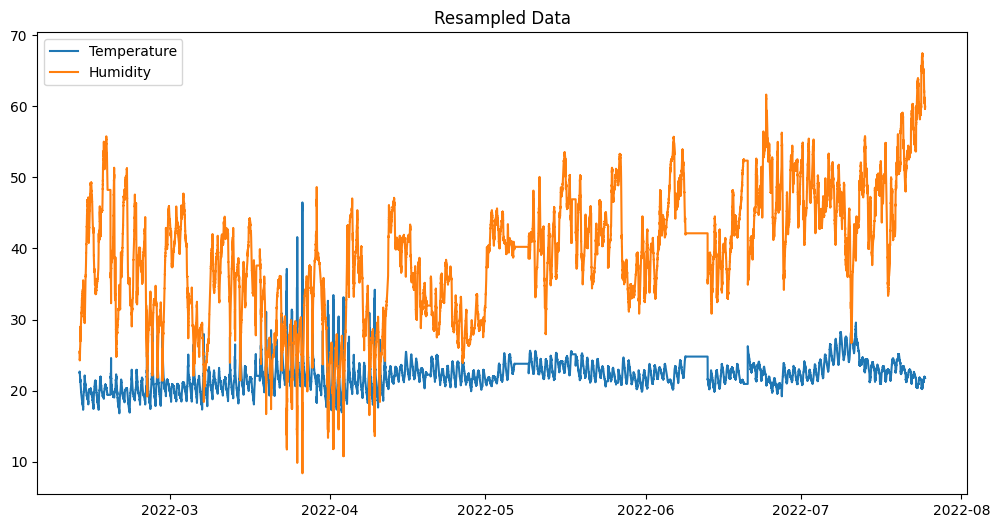

In [ ]:
# Plot the resampled data
# Iniatial plots and visualization of the datframes
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Temperature'], label='Temperature')
plt.plot(df_resampled.index, df_resampled['Humidity'], label='Humidity')
plt.legend()
plt.title('Resampled Data')
plt.show()

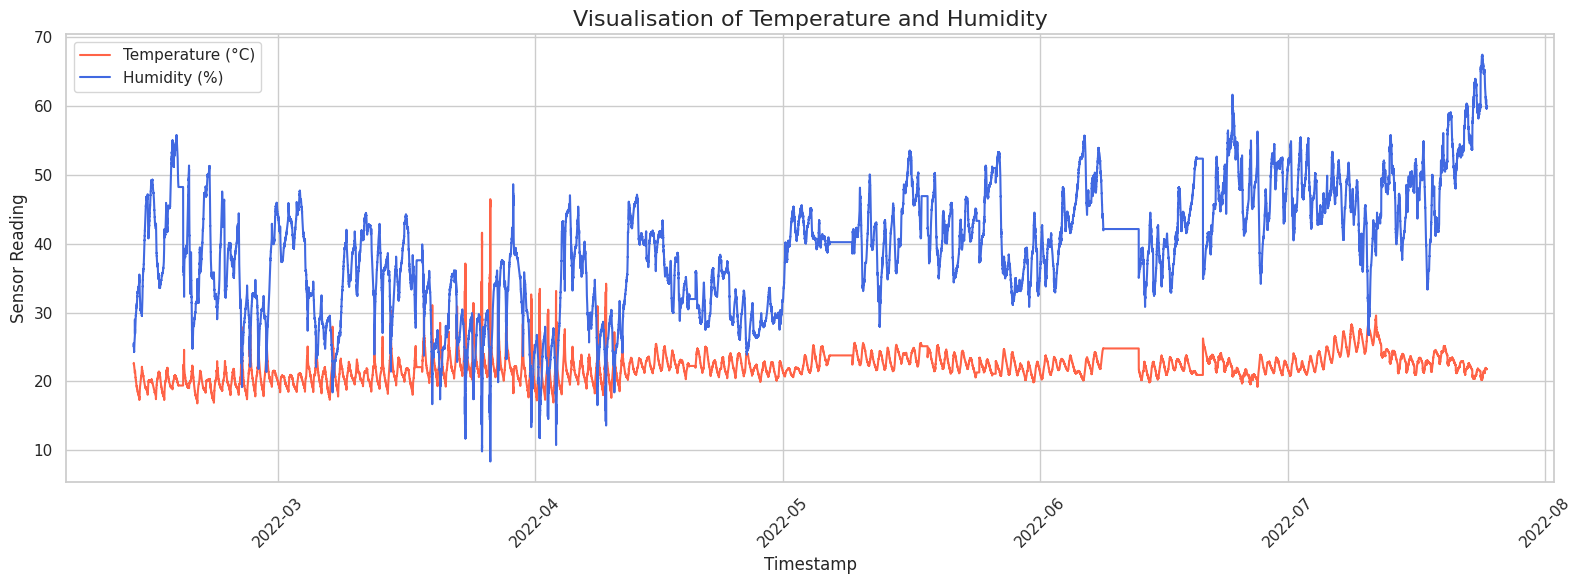

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#niatial plots and visualization of the datframes

# Set style for clean visual
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(16, 6))
plt.plot(df_resampled.index, df_resampled['Temperature'], label='Temperature (°C)', color='tomato', linewidth=1.5)
plt.plot(df_resampled.index, df_resampled['Humidity'], label='Humidity (%)', color='royalblue', linewidth=1.5)

# Add labels and title
plt.title('Visualisation of Temperature and Humidity', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sensor Reading', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()


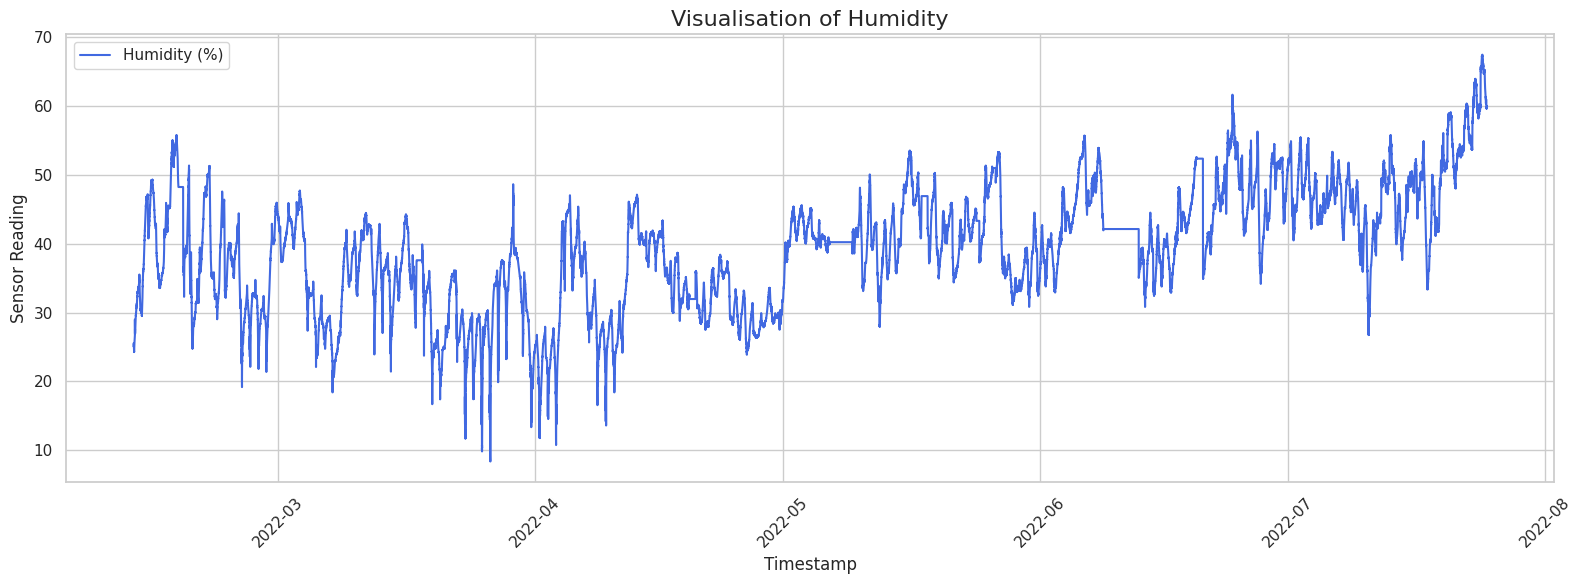

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Iniatial plots and visualization of the datframes


# Set style for clean visual
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(16, 6))
#plt.plot(df_resampled.index, df_resampled['Temperature'], label='Temperature (°C)', color='tomato', linewidth=1.5)
plt.plot(df_resampled.index, df_resampled['Humidity'], label='Humidity (%)', color='royalblue', linewidth=1.5)

# Add labels and title
plt.title('Visualisation of Humidity', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sensor Reading', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
# Print duplicate rows
duplicate_rows = df_resampled[df_resampled.duplicated(keep=False)]  # keep=False marks all duplicates

Sample duplicate rows:
 Sensor               Accelerometer        Gas  Humidity  Light  MIC  Pressure  \
timestamp                                                                       
2022-02-15 11:51:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:52:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:53:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:54:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:55:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:56:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:57:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:58:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 11:59:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   
2022-02-15 12:00:00            0.0  1242.1948   45.1868  250.2  3.0   99970.8   

Sen

split data into training and test

In [ ]:

# Split: first 4 months as training, last 2 months as testing
split_time = df_resampled.index.min() + pd.DateOffset(months=4)

train_df = df_resampled.loc[df_resampled.index < split_time]
test_df  = df_resampled.loc[df_resampled.index >= split_time]
train_df = train_df[['Temperature', 'Humidity']]
test_df = test_df[['Temperature', 'Humidity']]

print("Testing set:", test_df.shape)
print(test_df.head())


Testing set: (62527, 2)
Sensor               Temperature  Humidity
timestamp                                 
2022-06-11 13:45:00    24.778333   42.1405
2022-06-11 13:46:00    24.778333   42.1405
2022-06-11 13:47:00    24.778333   42.1405
2022-06-11 13:48:00    24.778333   42.1405
2022-06-11 13:49:00    24.778333   42.1405


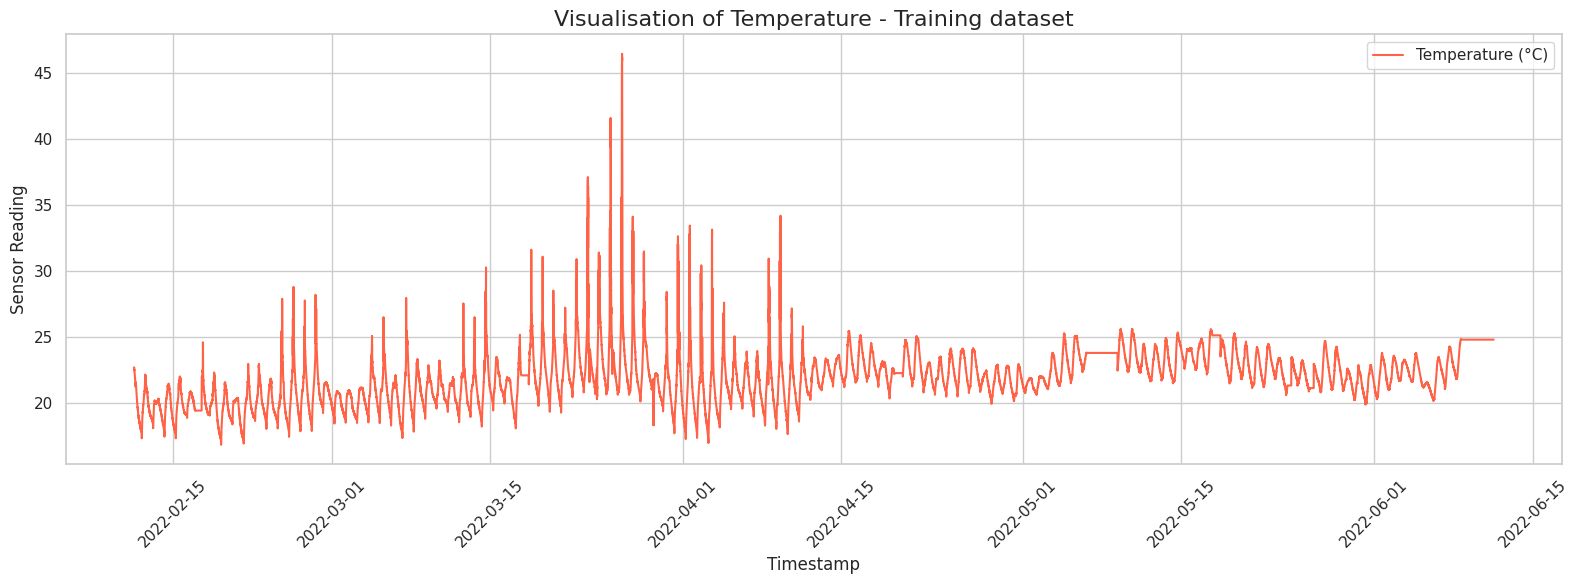

In [ ]:
# visualization of training dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for clean visual
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(16, 6))
plt.plot(train_df.index, train_df['Temperature'], label='Temperature (°C)', color='tomato', linewidth=1.5)
#plt.plot(train_df.index, train_df['Humidity'], label='Humidity (%)', color='royalblue', linewidth=1.5)

# Add labels and title
plt.title('Visualisation of Temperature - Training dataset', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sensor Reading', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()

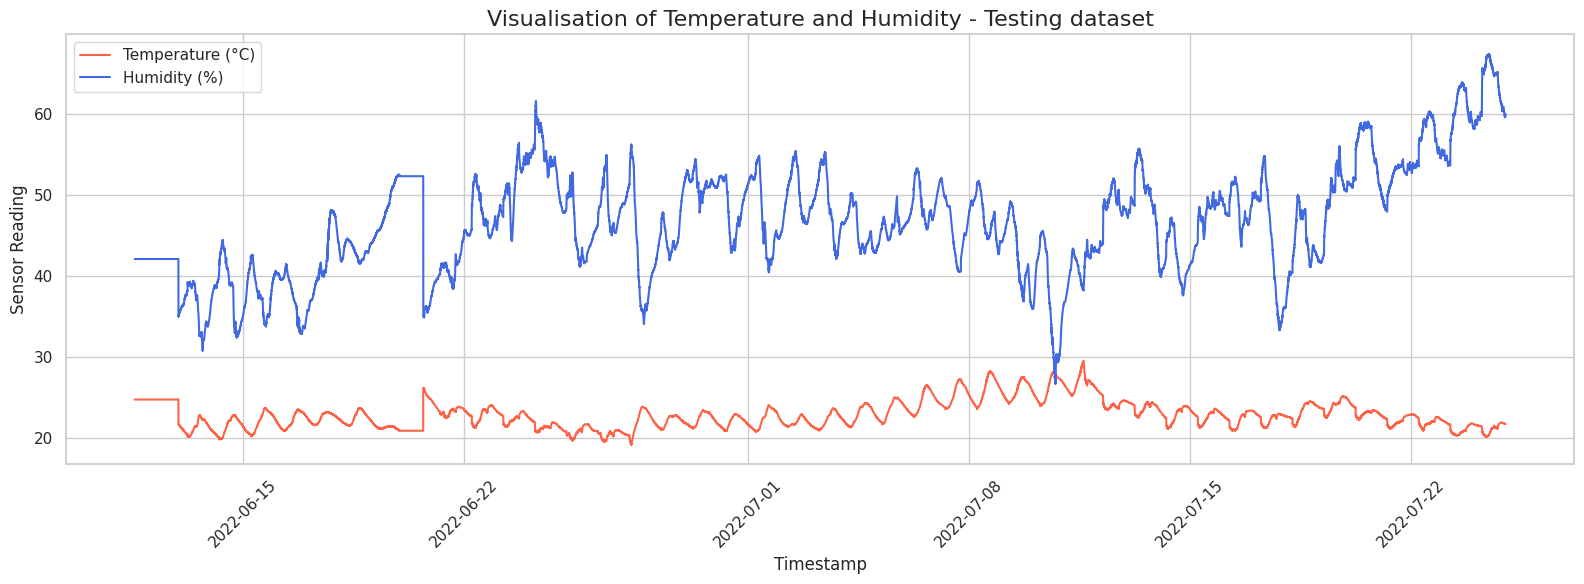

In [ ]:
# visualization of training dataset


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for clean visual
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(16, 6))
plt.plot(test_df.index, test_df['Temperature'], label='Temperature (°C)', color='tomato', linewidth=1.5)
plt.plot(test_df.index, test_df['Humidity'], label='Humidity (%)', color='royalblue', linewidth=1.5)

# Add labels and title
plt.title('Visualisation of Temperature and Humidity - Testing dataset', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sensor Reading', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
#Normalise using minmax scaler

scaler = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_hum = MinMaxScaler()

train_data_multi = scaler.fit_transform(train_df[['Temperature', 'Humidity']])
#train_clealened_scaler = scaler.fit_transform(train_cleaned[['Temperature', 'Humidity']])
test_data_multi  = scaler.transform(test_df[['Temperature', 'Humidity']])

train_data_temp = scaler_temp.fit_transform(train_df[['Temperature']])
test_data_temp  = scaler_temp.transform(test_df[['Temperature']])

train_data_hum = scaler_hum.fit_transform(train_df[['Humidity']])
test_data_hum  = scaler_hum.transform(test_df[['Humidity']])

print(train_data_multi)
print(test_data_multi)
print(train_data_temp)
print(test_data_temp)
print(train_data_hum)
print(test_data_hum)

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_df[['Temperature', 'Humidity']])  # Fit on train
test_data_scaled = scaler.transform(test_df[['Temperature', 'Humidity']])

[[0.19414044 0.35795526]
 [0.19419655 0.3561744 ]
 [0.19745189 0.36302389]
 ...
 [0.26901273 0.7122434 ]
 [0.26901273 0.7122434 ]
 [0.26901273 0.7122434 ]]
[[0.26901273 0.7122434 ]
 [0.26901273 0.7122434 ]
 [0.26901273 0.7122434 ]
 ...
 [0.16731209 1.08755426]
 [0.16719985 1.08799686]
 [0.16719983 1.0891244 ]]
[[0.19414044]
 [0.19419655]
 [0.19745189]
 ...
 [0.26901273]
 [0.26901273]
 [0.26901273]]
[[0.26901273]
 [0.26901273]
 [0.26901273]
 ...
 [0.16731209]
 [0.16719985]
 [0.16719983]]
[[0.35795526]
 [0.3561744 ]
 [0.36302389]
 ...
 [0.7122434 ]
 [0.7122434 ]
 [0.7122434 ]]
[[0.7122434 ]
 [0.7122434 ]
 [0.7122434 ]
 ...
 [1.08755426]
 [1.08799686]
 [1.0891244 ]]


In [ ]:
print("Original train data shape:", train_df[['Temperature', 'Humidity']].shape)
print("Scaled train data shape:", train_data_multi.shape)
print("Original test data shape:", test_df[['Temperature', 'Humidity']].shape)
print("Scaled test data shape:", test_data_multi.shape)

Original train data shape: (172800, 2)
Scaled train data shape: (172800, 2)
Original test data shape: (62527, 2)
Scaled test data shape: (62527, 2)


In [ ]:
# Inverse transform
train_data_original = scaler.inverse_transform(train_data_multi)
test_data_original = scaler.inverse_transform(test_data_multi)

temp_original = scaler_temp.inverse_transform(train_data_temp)
hum_original = scaler_hum.inverse_transform(train_data_hum)

# Compare original and inverse-transformed data
print("Original train data (first 5 rows):\n", train_df[['Temperature', 'Humidity']].head())
print("Inverse-transformed train data (first 5 rows):\n", train_data_original[:5])

Original train data (first 5 rows):
 Sensor               Temperature   Humidity
timestamp                                  
2022-02-11 13:45:00    22.555000  25.330000
2022-02-11 13:46:00    22.556667  25.245500
2022-02-11 13:47:00    22.653334  25.570500
2022-02-11 13:48:00    22.673333  25.463833
2022-02-11 13:49:00    22.638334  25.379667
Inverse-transformed train data (first 5 rows):
 [[22.55500031 25.32999992]
 [22.55666669 25.24550025]
 [22.65333398 25.57049974]
 [22.67333349 25.46383317]
 [22.63833364 25.37966696]]


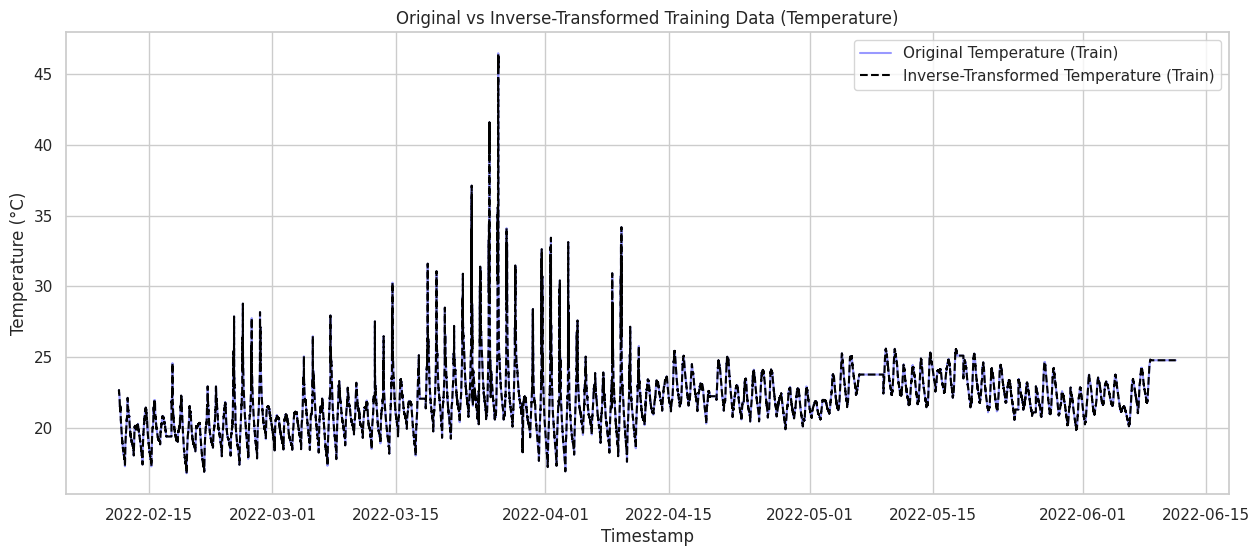

In [ ]:
# Plot original vs inverse-transformed data
plt.figure(figsize=(15, 6))
plt.plot(train_df.index, train_df['Temperature'], label='Original Temperature (Train)', color='blue', alpha=0.4)
plt.plot(train_df.index, train_data_original[:, 0], label='Inverse-Transformed Temperature (Train)', linestyle='--', color='black')
plt.title('Original vs Inverse-Transformed Training Data (Temperature)')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

**        Multivariate data - temperature and humidity**


In [ ]:
import numpy as np
# Use the original resampled data (no sequences)
X_train_iso = train_data_multi  # Shape: (n_samples, 2)
X_test_iso = test_data_multi   # Shape: (n_samples, 2)

# Train Isolation Forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.2)
iso_forest.fit(X_train_iso)

# Detect anomalies
test_anomalies_iso_multi = iso_forest.predict(X_test_iso) == -1
test_original = scaler.inverse_transform(test_data_multi)

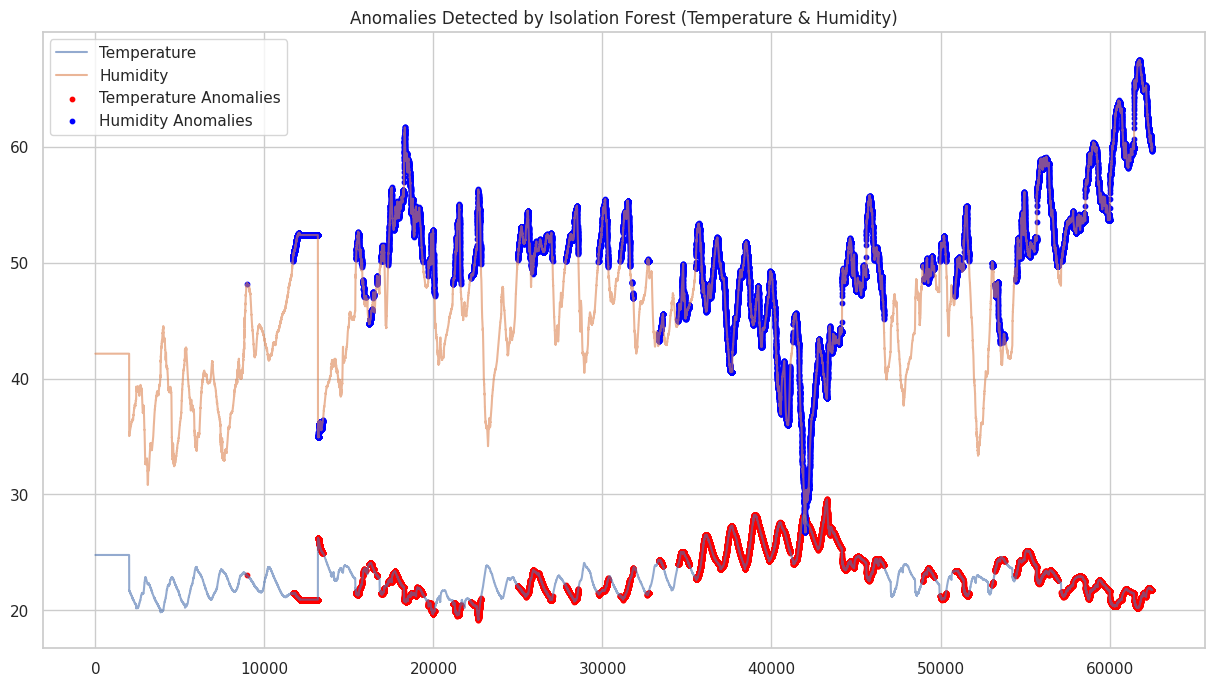

In [ ]:
plt.figure(figsize=(15, 8))

# Plot temperature and humidity
plt.plot(test_original[:, 0], label='Temperature', alpha=0.6)
plt.plot(test_original[:, 1], label='Humidity', alpha=0.6)

# Highlight anomalies
plt.scatter(
    np.where(test_anomalies_iso_multi)[0],
    test_original[test_anomalies_iso_multi, 0],
    color='red', s=10, label='Temperature Anomalies'
)
plt.scatter(
    np.where(test_anomalies_iso_multi)[0],
    test_original[test_anomalies_iso_multi, 1],
    color='blue', s=10, label='Humidity Anomalies'
)

plt.title('Anomalies Detected by Isolation Forest (Temperature & Humidity)')
plt.legend()
plt.show()

isolation forest - Univariate data - temperature

62527


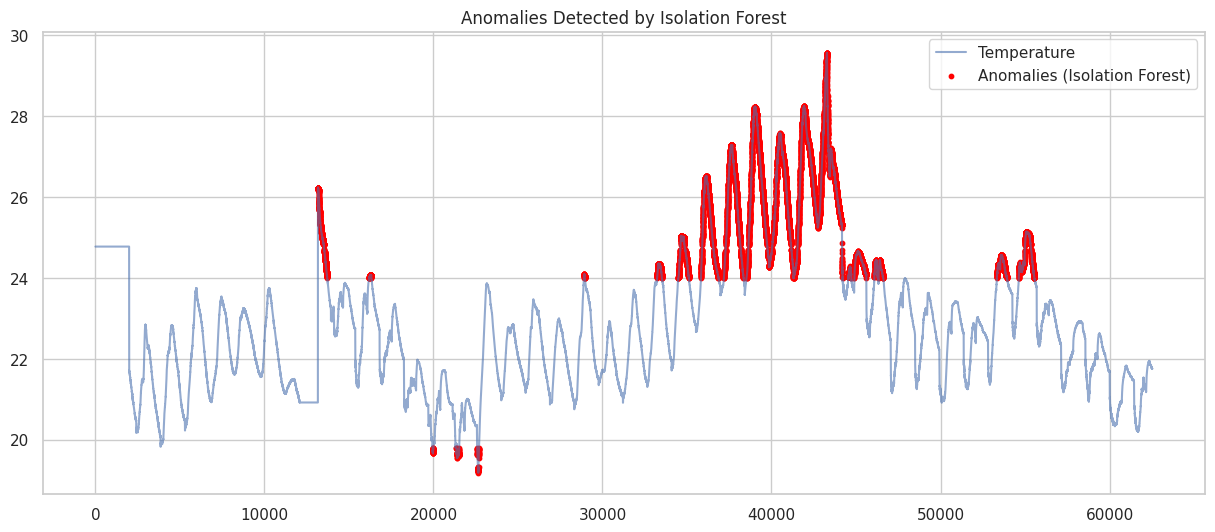

In [ ]:
import numpy as np

X_train_iso = train_data_temp
X_test_iso = test_data_temp

# Train Isolation Forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(X_train_iso)

# Detect anomalies using predict function
test_anomalies_iso_temp = iso_forest.predict(X_test_iso) == -1


print(len(test_anomalies_iso_temp))

# plotting anomalies on testing data
temp_test_original = scaler_temp.inverse_transform(test_data_temp)

plt.figure(figsize=(15, 6))
plt.plot(temp_test_original[:, 0], label='Temperature', alpha=0.6)
plt.scatter(np.where(test_anomalies_iso_temp)[0], temp_test_original[test_anomalies_iso_temp, 0],
            color='red', s=10, label='Anomalies (Isolation Forest)')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()


Isolation Forest - Univariate data - humidity

[False False False ...  True  True  True]
[-0.18341381 -0.18341381 -0.18341381 ...  0.11574962  0.11574962
  0.11574962]
Threshold: 0.09898055988624876
[False False False ...  True  True  True]


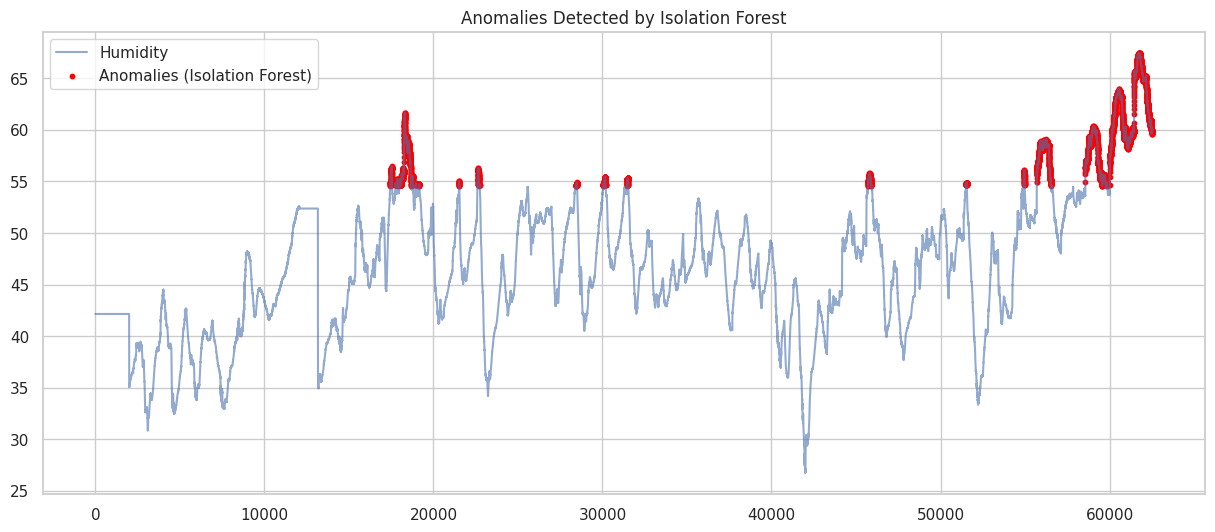

In [ ]:
import numpy as np
# Use the original resampled data (no sequences)
X_train_iso = train_data_hum  # Shape: (n_samples, 2)
X_test_iso = test_data_hum   # Shape: (n_samples, 2)

# Train Isolation Forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train_iso)

# Detect anomalies
test_anomalies_iso_hum = iso_forest.predict(X_test_iso) == -1
iso_scores_hum = -iso_forest.decision_function(X_test_iso)  # Negate to have higher scores => more anomalous

print(test_anomalies_iso_hum)
print(iso_scores_hum)

threshold = np.percentile(iso_scores_hum, 90)  # Lower percentile = stricter threshold
print("Threshold:", threshold)  # Example: -0.18

# Flag anomalies

test_anomalies = iso_scores_hum > threshold
test_anomalies_iso_hum = test_anomalies
# print(test_anomalies)
# plotting anomalies on testing data

hum_test_original = scaler_hum.inverse_transform(test_data_hum)

plt.figure(figsize=(15, 6))
plt.plot(hum_test_original[:, 0], label='Humidity', alpha=0.6)
plt.scatter(np.where(test_anomalies_iso_hum)[0], hum_test_original[test_anomalies_iso_hum, 0],
            color='red', s=10, label='Anomalies (Isolation Forest)')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()

one class svm - Univariate data - temperature





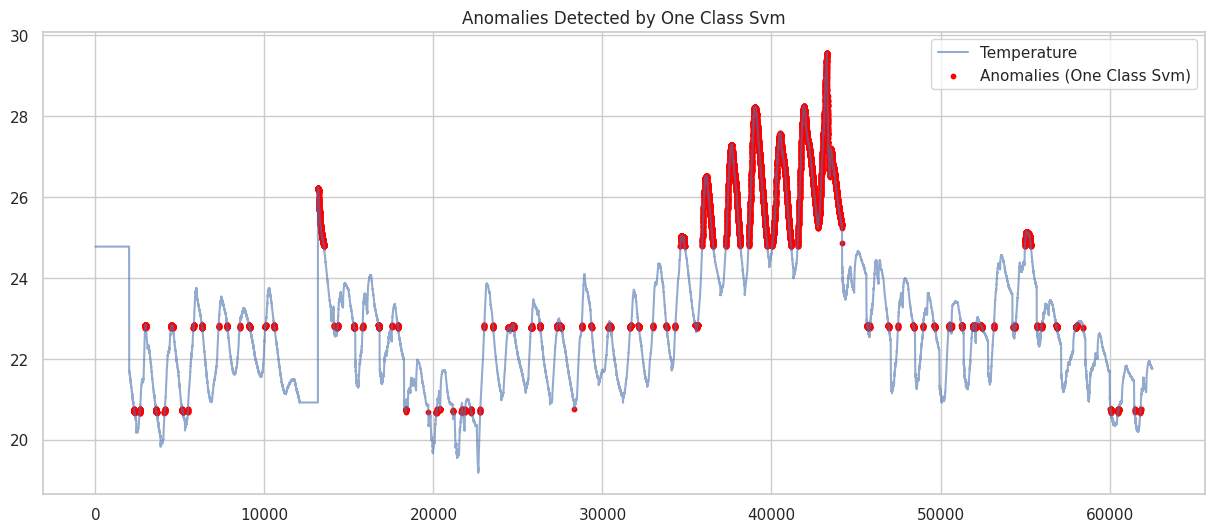

In [ ]:
from sklearn.svm import OneClassSVM
# Use the original resampled data
X_train = train_data_temp
X_test = test_data_temp


# Train
oc_svm = OneClassSVM(nu=0.15)
oc_svm.fit(X_train)

# Predict anomalies
test_scores_svm = oc_svm.decision_function(X_test)
test_anomalies_svm_temp = test_scores_svm < np.quantile(test_scores_svm, 0.15)

temp_test_original = scaler_temp.inverse_transform(test_data_temp)

plt.figure(figsize=(15, 6))
plt.plot(temp_test_original[:, 0], label='Temperature', alpha=0.6)
plt.scatter(np.where(test_anomalies_svm_temp)[0], temp_test_original[test_anomalies_svm_temp, 0],
            color='red', s=10, label='Anomalies (One Class Svm)')
plt.title('Anomalies Detected by One Class Svm')
plt.legend()
plt.show()

one class svm - Univariate data - Humidity


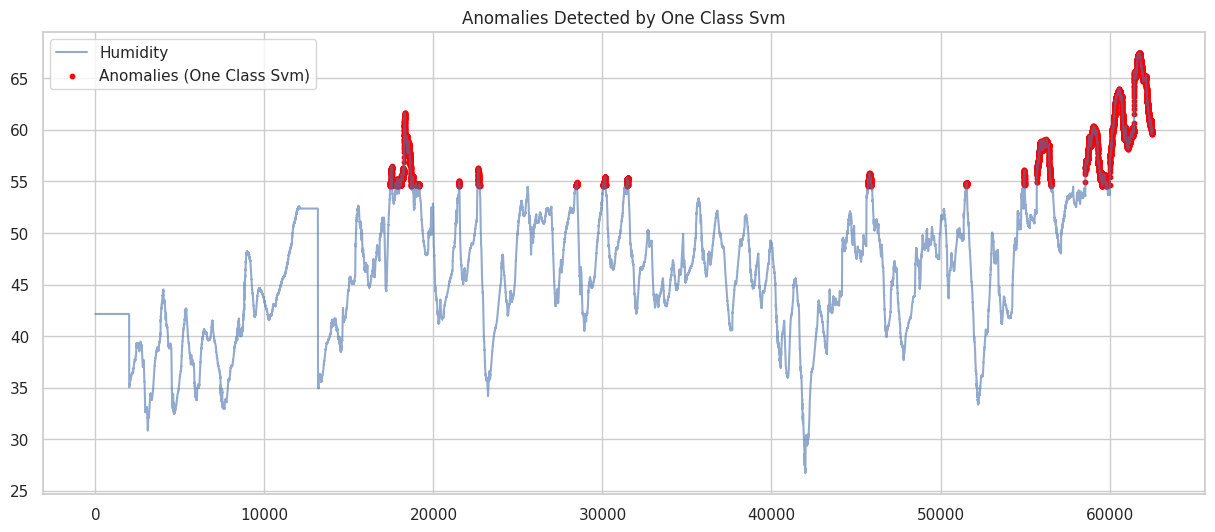

In [ ]:
from sklearn.svm import OneClassSVM

# Prepare univariate humidity data
X_train = train_data_hum
X_test = test_data_hum

# Train one class svm model
oc_svm = OneClassSVM(nu=0.1)
oc_svm.fit(X_train)

# Predict anomalies
test_scores_svm_hum = oc_svm.decision_function(X_test)
test_anomalies_svm_hum = test_scores_svm_hum  < np.quantile(test_scores_svm_hum , 0.1)

# plot anomalies
hum_test_original = scaler_hum.inverse_transform(test_data_hum)

plt.figure(figsize=(15, 6))
plt.plot(hum_test_original[:, 0], label='Humidity', alpha=0.6)
plt.scatter(np.where(test_anomalies_svm_hum)[0], hum_test_original[test_anomalies_svm_hum, 0],
            color='red', s=10, label='Anomalies (One Class Svm)')
plt.title('Anomalies Detected by One Class Svm')
plt.legend()
plt.show()

one class svm - Multivariate data - temperature and humidity


In [ ]:
from sklearn.svm import OneClassSVM
X_train_one = train_data_multi
X_test_one = test_data_multi

# Train
oc_svm = OneClassSVM(nu=0.2)
oc_svm.fit(X_train_one)

# Predict anomalies
test_scores_svm_multi = oc_svm.decision_function(X_test_one)
test_anomalies_svm_multi = test_scores_svm_multi < np.quantile(test_scores_svm_multi, 0.2)

plot anomalies for One-class SVM - multivariate Data

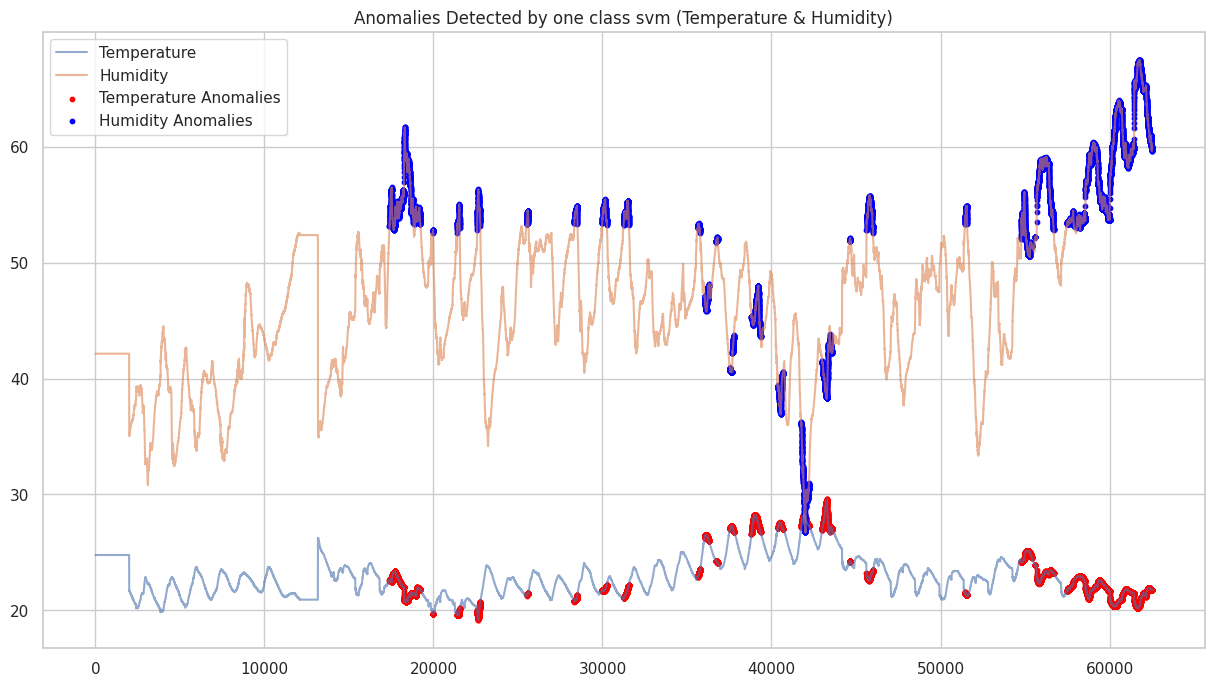

In [ ]:
plt.figure(figsize=(15, 8))
test_original = scaler.inverse_transform(test_data_multi)


# Plot temperature and humidity
plt.plot(test_original[:, 0], label='Temperature', alpha=0.6)
plt.plot(test_original[:, 1], label='Humidity', alpha=0.6)

# Highlight anomalies
plt.scatter(
    np.where(test_anomalies_svm_multi)[0],
    test_original[test_anomalies_svm_multi, 0],
    color='red', s=10, label='Temperature Anomalies'
)
plt.scatter(
    np.where(test_anomalies_svm_multi)[0],
    test_original[test_anomalies_svm_multi, 1],
    color='blue', s=10, label='Humidity Anomalies'
)

plt.title('Anomalies Detected by one class svm (Temperature & Humidity)')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Lstm autoencoder - multi variate

In [ ]:
train_data = train_data_multi
test_data = test_data_multi


# this creates sequence of the training data and test data
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

seq_length = 30  # 30-minute sequences
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

X_train_temp = create_sequences(train_data_temp, seq_length)
X_test_temp = create_sequences(test_data_temp, seq_length)
X_train_hum = create_sequences(train_data_hum, seq_length)
X_test_hum = create_sequences(test_data_hum, seq_length)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define model
inputs = tf.keras.Input(shape=(seq_length, 2))
x = LSTM(64, activation='relu', return_sequences=True)(inputs)
x = LSTM(32, activation='relu', return_sequences=False)(x)
x = RepeatVector(seq_length)(x)
x = LSTM(32, activation='relu', return_sequences=True)(x)
x = LSTM(64, activation='relu', return_sequences=True)(x)
outputs = TimeDistributed(Dense(2))(x)
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True ,dpi=48)
model.summary()

# Train
model.fit(X_train, X_train, epochs=20, batch_size=128, validation_split=0.1)

# Detect anomalies (reconstruction error)
train_pred = model.predict(X_train)
train_mse_multi = np.mean(np.power(X_train - train_pred, 2), axis=(1, 2))
test_pred = model.predict(X_test)
test_mse_multi = np.mean(np.power(X_test - test_pred, 2), axis=(1, 2))

# Thresholding based on percentile of training errors
threshold = np.quantile(train_mse_multi, 0.95)
test_anomalies_lstm = test_mse_multi > threshold

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 2)          │           130 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,850 (245.51 KB)

 Trainable params: 62,850 (245.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0173 - val_loss: 1.7516e-05
Epoch 2/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - loss: 8.3736e-05 - val_loss: 1.9116e-05
Epoch 3/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 7.6750e-05 - val_loss: 1.0656e-05
Epoch 4/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 6.8008e-05 - val_loss: 8.4338e-06
Epoch 5/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 4.4370e-05 - val_loss: 1.6077e-05
Epoch 6/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 4.2476e-05 - val_loss: 6.0400e-06
Epoch 7/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 3.7105e-05 - val_loss: 2.8777e-05
Epoch 8/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 4.0983e-05 - val_loss: 1.9642e-05
Epoch 9/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 3.4125e-05 - val_loss: 1.5528e-05
Epoch 10/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 3.5811e-05 - val_loss: 9.9562e-06
Epoch 11/20
1215/1215 ━

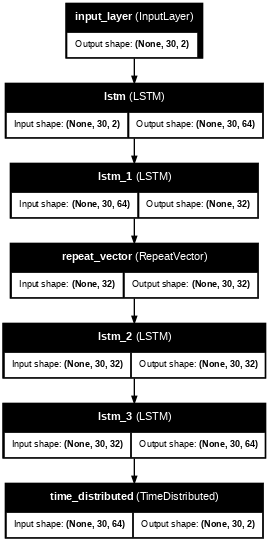

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, dpi=48)

In [ ]:
# Adjust anomaly indices to match original data
adjusted_anomaly_indices = np.where(test_anomalies_lstm)[0] + (seq_length - 1)

# Ensure indices don’t exceed original data bounds
adjusted_anomaly_indices = adjusted_anomaly_indices[adjusted_anomaly_indices < len(test_original)]

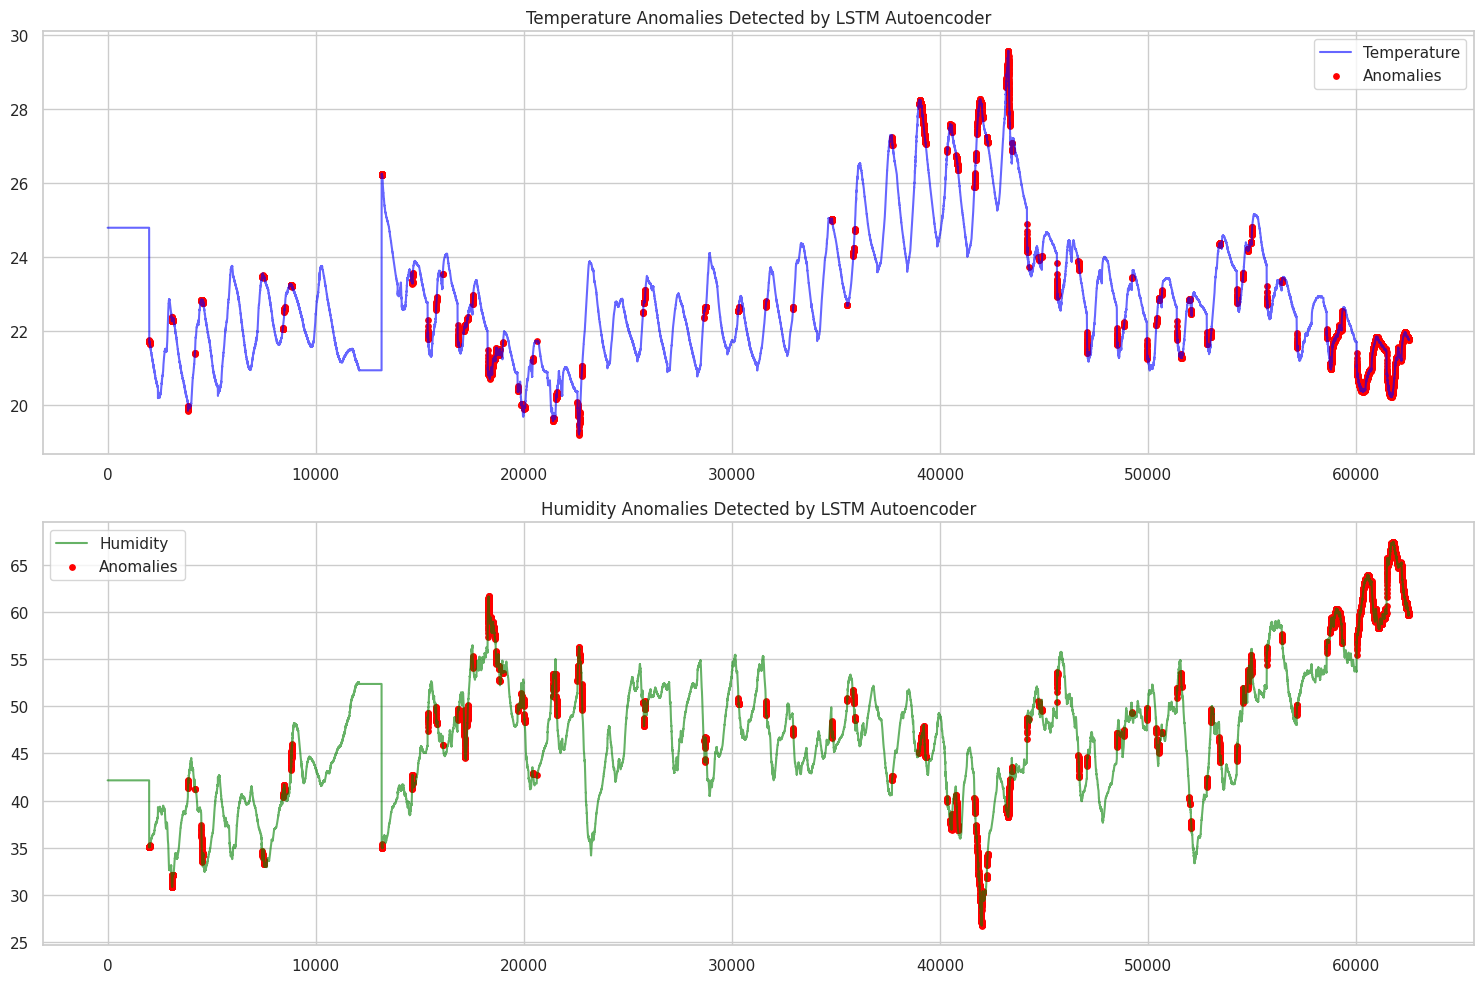

In [ ]:
# Create subplots for temperature and humidity
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot Temperature with Anomalies
axes[0].plot(test_original[:, 0], label='Temperature', alpha=0.6, color='blue')
axes[0].scatter(
    adjusted_anomaly_indices,test_original[adjusted_anomaly_indices, 0], color='red', s=15, label='Anomalies'
)
axes[0].set_title('Temperature Anomalies Detected by LSTM Autoencoder')
axes[0].legend()

# Plot Humidity with Anomalies
axes[1].plot(test_original[:, 1], label='Humidity', alpha=0.6, color='green')
axes[1].scatter(
    adjusted_anomaly_indices,
    test_original[adjusted_anomaly_indices, 1],
    color='red', s=15, label='Anomalies'
)
axes[1].set_title('Humidity Anomalies Detected by LSTM Autoencoder')
axes[1].legend()

plt.tight_layout()
plt.show()

LSTM AutoEncoder - univariate - temperature

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define model
inputs = tf.keras.Input(shape=(seq_length, 1))
x = LSTM(64, activation='relu', return_sequences=True)(inputs)
x = LSTM(32, activation='relu', return_sequences=False)(x)
x = RepeatVector(seq_length)(x)
x = LSTM(32, activation='relu', return_sequences=True)(x)
x = LSTM(64, activation='relu', return_sequences=True)(x)
outputs = TimeDistributed(Dense(1))(x)
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train
model.fit(X_train_temp, X_train_temp, epochs=20, batch_size=128, validation_split=0.1)

# Detect anomalies (reconstruction error)
train_pred = model.predict(X_train_temp)
train_mse_temp = np.mean(np.power(X_train_temp - train_pred, 2), axis=(1, 2))
test_pred = model.predict(X_test_temp)
test_mse_temp = np.mean(np.power(X_test_temp - test_pred, 2), axis=(1, 2))

# Thresholding based on percentile of training errors
threshold = np.quantile(train_mse_temp, 0.90)
test_anomalies_lstm_temp = test_mse_temp > threshold

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 30, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0036 - val_loss: 6.6475e-06
Epoch 2/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 8.8815e-05 - val_loss: 4.0255e-06
Epoch 3/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 6.9030e-05 - val_loss: 4.2664e-06
Epoch 4/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 4.0225e-05 - val_loss: 2.4218e-06
Epoch 5/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 3.3840e-05 - val_loss: 8.5936e-06
Epoch 6/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 3.2762e-05 - val_loss: 2.8106e-06
Epoch 7/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 2.9244e-05 - val_loss: 2.5947e-06
Epoch 8/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 2.1843e-05 - val_loss: 1.5107e-06
Epoch 9/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 2.1177e-05 - val_loss: 2.1570e-06
Epoch 10/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 2.0675e-05 - val_loss: 1.5285e-06
Epoch 11/20
1215/1215 ━

In [ ]:
# Adjust anomaly indices to match original data
adjusted_anomaly_indices = np.where(test_anomalies_lstm_temp)[0] + (seq_length - 1)

# Ensure indices don’t exceed original data bounds
adjusted_anomaly_indices = adjusted_anomaly_indices[adjusted_anomaly_indices < len(temp_test_original)]

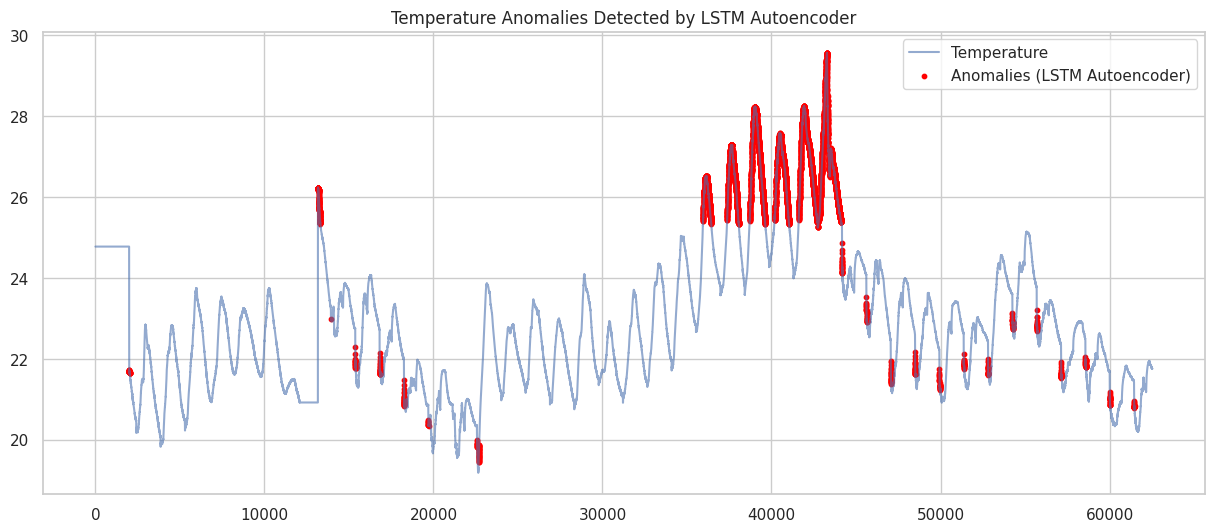

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(temp_test_original[:, 0], label='Temperature', alpha=0.6)
plt.scatter((adjusted_anomaly_indices), temp_test_original[adjusted_anomaly_indices, 0],
            color='red', s=10, label='Anomalies (LSTM Autoencoder)')
plt.title('Temperature Anomalies Detected by LSTM Autoencoder')
plt.legend()
plt.show()

LSTM AutoEncoder - univariate - humidity

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define model
inputs = tf.keras.Input(shape=(seq_length, 1))
x = LSTM(64, activation='relu', return_sequences=True)(inputs)
x = LSTM(32, activation='relu', return_sequences=False)(x)
x = RepeatVector(seq_length)(x)
x = LSTM(32, activation='relu', return_sequences=True)(x)
x = LSTM(64, activation='relu', return_sequences=True)(x)
outputs = TimeDistributed(Dense(1))(x)
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train_hum, X_train_hum, epochs=20, batch_size=128, validation_split=0.1)

# Detect anomalies (reconstruction error)
train_pred = model.predict(X_train_hum)
train_mse_hum = np.mean(np.power(X_train_hum - train_pred, 2), axis=(1, 2))
test_pred = model.predict(X_test_hum)
test_mse_hum = np.mean(np.power(X_test_hum - test_pred, 2), axis=(1, 2))

# Thresholding based on percentile of training errors
threshold = np.quantile(train_mse_hum, 0.99)
test_anomalies_lstm_hum = test_mse_hum > threshold

Epoch 1/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - loss: 0.0299 - val_loss: 1.4722e-05
Epoch 2/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 5.8561e-05 - val_loss: 1.3895e-05
Epoch 3/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 4.9518e-05 - val_loss: 1.3638e-05
Epoch 4/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 4.4718e-05 - val_loss: 1.6426e-05
Epoch 5/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 3.8138e-05 - val_loss: 2.1172e-05
Epoch 6/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 3.4009e-05 - val_loss: 1.6714e-05
Epoch 7/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 2.5091e-05 - val_loss: 1.4577e-04
Epoch 8/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 3.0225e-05 - val_loss: 5.9575e-06
Epoch 9/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 2.1991e-05 - val_loss: 6.6401e-05
Epoch 10/20
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 2.7804e-05 - val_loss: 1.5484e-05
Epoch 11/20
1215/1215 ━

In [ ]:
print(len(test_anomalies_lstm_hum))
# Adjust anomaly indices to match original data
adjusted_anomaly_indices = np.where(test_anomalies_lstm_hum)[0] + (seq_length - 1)
print(len(adjusted_anomaly_indices))

# Ensure indices don’t exceed original data bounds
adjusted_anomaly_indices = adjusted_anomaly_indices[adjusted_anomaly_indices < len(hum_test_original)]
print(len(adjusted_anomaly_indices))

62497
3463
3463


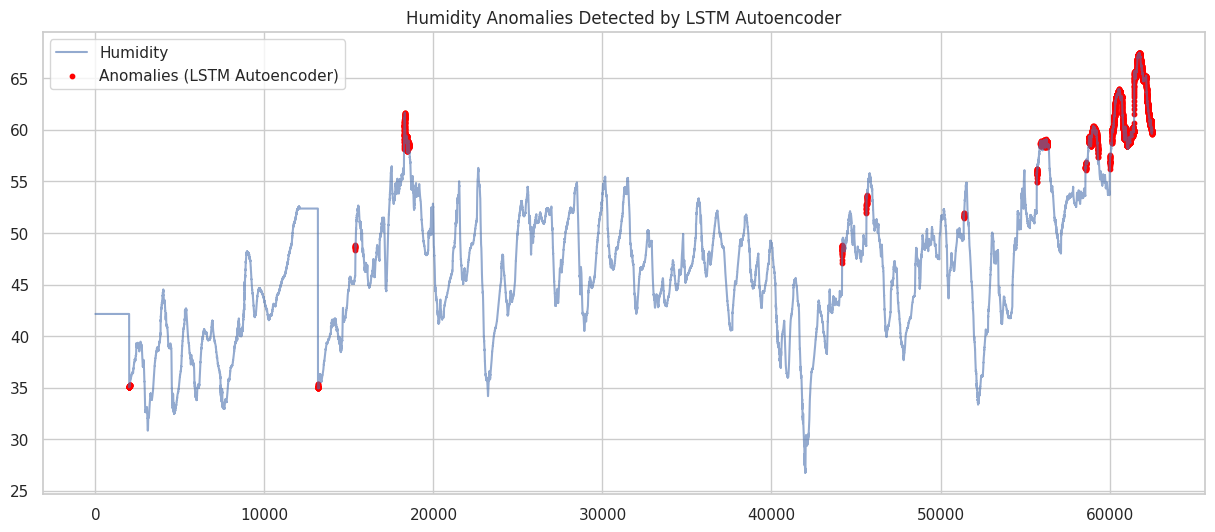

In [ ]:

plt.figure(figsize=(15, 6))
plt.plot(hum_test_original[:, 0], label='Humidity', alpha=0.6)
plt.scatter((adjusted_anomaly_indices), hum_test_original[adjusted_anomaly_indices, 0],
            color='red', s=10, label='Anomalies (LSTM Autoencoder)')
plt.title('Humidity Anomalies Detected by LSTM Autoencoder')
plt.legend()
plt.show()

In [ ]:
# Label anomalies based on temperature thresholds
temperature_anomalies = (test_original[:, 0] < 18) | (test_original[:, 0] > 24)

# Convert boolean labels to 0 (normal) and 1 (anomaly)
y_true = temperature_anomalies.astype(int)

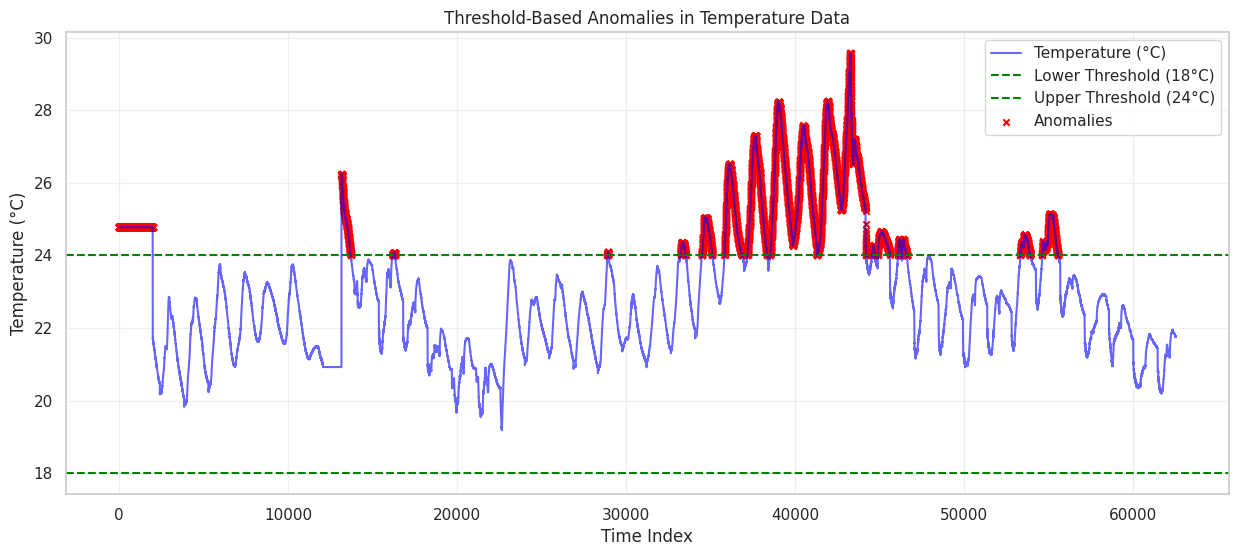

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot temperature data with threshold-based anomalies
plt.figure(figsize=(15, 6))

# Plot the temperature data
plt.plot(test_original[:, 0], label='Temperature (°C)', alpha=0.6, color='blue')

# Add threshold lines
plt.axhline(18, color='green', linestyle='--', linewidth=1.5, label='Lower Threshold (18°C)')
plt.axhline(24, color='green', linestyle='--', linewidth=1.5, label='Upper Threshold (24°C)')

# Highlight anomalies
anomaly_indices = np.where(temperature_anomalies)[0]
plt.scatter(
    anomaly_indices,
    test_original[anomaly_indices, 0],
    color='red', s=20, marker='x', label='Anomalies'
)

# Add labels and legend
plt.xlabel('Time Index')
plt.ylabel('Temperature (°C)')
plt.title('Threshold-Based Anomalies in Temperature Data')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
print(test_df[['Temperature', 'Humidity']])


# train_df[['Temperature']]
# test_data_temp  = scaler_temp.transform(test_df[['Temperature']])


# test_df[['Humidity']])

Sensor               Temperature   Humidity
timestamp                                  
2022-06-11 13:45:00    24.778333  42.140500
2022-06-11 13:46:00    24.778333  42.140500
2022-06-11 13:47:00    24.778333  42.140500
2022-06-11 13:48:00    24.778333  42.140500
2022-06-11 13:49:00    24.778333  42.140500
...                          ...        ...
2022-07-24 23:47:00    21.766666  59.919000
2022-07-24 23:48:00    21.763333  59.941833
2022-07-24 23:49:00    21.758333  59.948500
2022-07-24 23:50:00    21.754999  59.969500
2022-07-24 23:51:00    21.754999  60.023001

[62527 rows x 2 columns]


In [ ]:
# label data 1 as normal and -1 as anomaly
def label_temperature(row):
    """

    0 = Normal if 18°C <= Temperature <= 24°C,
    1 = Anomaly otherwise.
    """
    if 18 <= row["Temperature"] <= 24.5:
        return 0
    else:
        return 1

def label_humidity(row):
    """

    0 = Normal if 30% <= Humidity <= 60%,
    1 = Anomaly otherwise.
    """
    if 30 <= row["Humidity"] <= 60:
        return 0
    else:
        return 1

def label_multivariate(row):
    """

    0 = Normal if both Temperature and Humidity are within their normal ranges,
    1 = Anomaly otherwise.
    """
    if (18 <= row["Temperature"] <= 24.5) and (30 <= row["Humidity"] <= 60):
        return 0
    else:
        return 1

test_df = test_df.copy()

# Use .loc to assign new columns safely
test_df.loc[:, "Label_Temperature"] = test_df.apply(label_temperature, axis=1)
test_df.loc[:, "Label_Humidity"] = test_df.apply(label_humidity, axis=1)
test_df.loc[:, "Label_Multivariate"] = test_df.apply(label_multivariate, axis=1)

# Display the first few rows to verify the labels
print(test_df[['Temperature', 'Humidity', 'Label_Temperature', 'Label_Humidity', 'Label_Multivariate']])


Sensor               Temperature   Humidity  Label_Temperature  \
timestamp                                                        
2022-06-11 13:45:00    24.778333  42.140500                  1   
2022-06-11 13:46:00    24.778333  42.140500                  1   
2022-06-11 13:47:00    24.778333  42.140500                  1   
2022-06-11 13:48:00    24.778333  42.140500                  1   
2022-06-11 13:49:00    24.778333  42.140500                  1   
...                          ...        ...                ...   
2022-07-24 23:47:00    21.766666  59.919000                  0   
2022-07-24 23:48:00    21.763333  59.941833                  0   
2022-07-24 23:49:00    21.758333  59.948500                  0   
2022-07-24 23:50:00    21.754999  59.969500                  0   
2022-07-24 23:51:00    21.754999  60.023001                  0   

Sensor               Label_Humidity  Label_Multivariate  
timestamp                                                
2022-06-11 13:45:00      

In [ ]:
print(test_anomalies_iso_temp.astype(int) )
y_true = test_df["Label_Temperature"].values
print(y_true)

[0 0 0 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# this function creates confusion matrix when y true and y prediction labels are given

def create_confusion_matrix(y_true_val, y_pred_val,label):
    # Compute the confusion matrix and classification report
  cm = confusion_matrix(y_true_val, y_pred_val)

  # Plot confusion matrix with heatmap
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
              xticklabels=['Predicted: Normal', 'Predicted: Anomaly'],
              yticklabels=['Actual: Normal', 'Actual: Anomaly'])
  plt.title(f"Confusion Matrix {label}")
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.tight_layout()
  plt.show()

  print("\nClassification Report:")
  print(classification_report(y_true_val, y_pred_val, target_names=["Normal", "Anomalous"]))

Confusion matrix - isolation forest - univariate temp

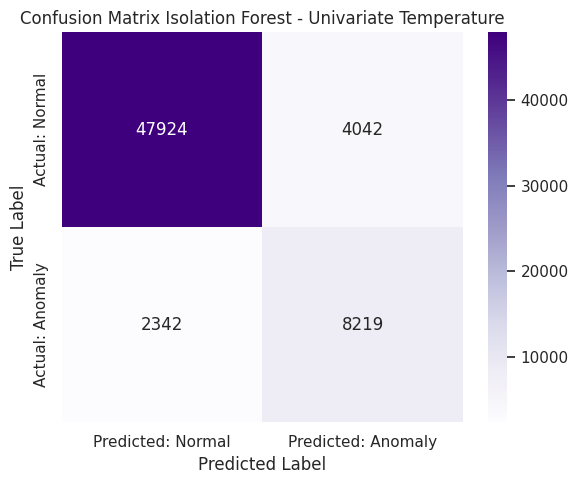


Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.92      0.94     51966
   Anomalous       0.67      0.78      0.72     10561

    accuracy                           0.90     62527
   macro avg       0.81      0.85      0.83     62527
weighted avg       0.91      0.90      0.90     62527



In [ ]:
# Assume your ground truth labels are in test_df["Label_Multivariate"]
y_true = test_df["Label_Temperature"].values
y_pred_iso = test_anomalies_iso_temp.astype(int)


create_confusion_matrix(y_true, y_pred_iso, "Isolation Forest - Univariate Temperature")


Confusion matrix - isolation forest - univariate hum

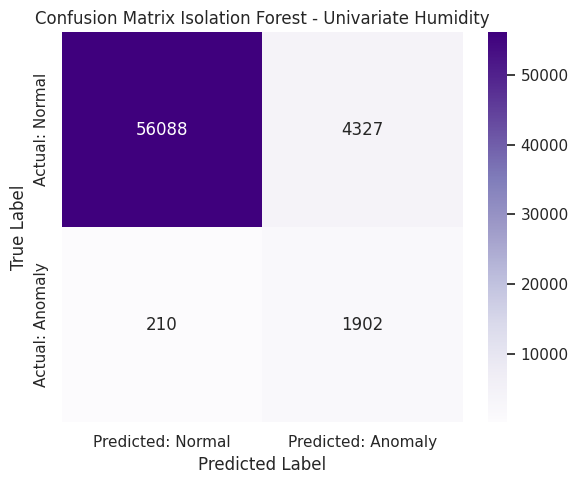


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.93      0.96     60415
   Anomalous       0.31      0.90      0.46      2112

    accuracy                           0.93     62527
   macro avg       0.65      0.91      0.71     62527
weighted avg       0.97      0.93      0.94     62527



In [ ]:
y_true = test_df["Label_Humidity"].values
y_pred_iso = test_anomalies_iso_hum.astype(int)

create_confusion_matrix(y_true, y_pred_iso, "Isolation Forest - Univariate Humidity")


Confusion matrix - isolation forest - multi

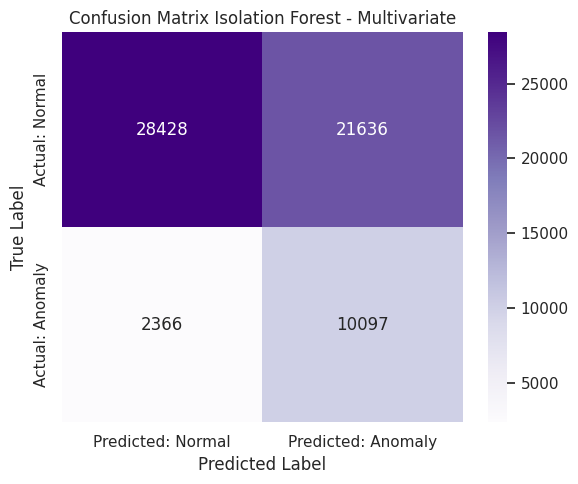


Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.57      0.70     50064
   Anomalous       0.32      0.81      0.46     12463

    accuracy                           0.62     62527
   macro avg       0.62      0.69      0.58     62527
weighted avg       0.80      0.62      0.65     62527



In [ ]:
y_true = test_df["Label_Multivariate"].values
y_pred_iso = test_anomalies_iso_multi.astype(int)

create_confusion_matrix(y_true, y_pred_iso, "Isolation Forest - Multivariate")

Confusion matrix - one class svm - Univariate Temperature

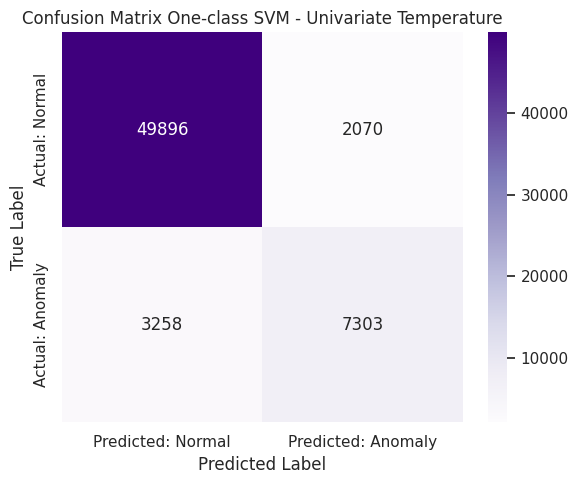


Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95     51966
   Anomalous       0.78      0.69      0.73     10561

    accuracy                           0.91     62527
   macro avg       0.86      0.83      0.84     62527
weighted avg       0.91      0.91      0.91     62527



In [ ]:
y_true = test_df["Label_Temperature"].values
y_pred_iso = test_anomalies_svm_temp.astype(int)

create_confusion_matrix(y_true, y_pred_iso, "One-class SVM - Univariate Temperature")

Confusion matrix - one class svm - Univariate Humidity

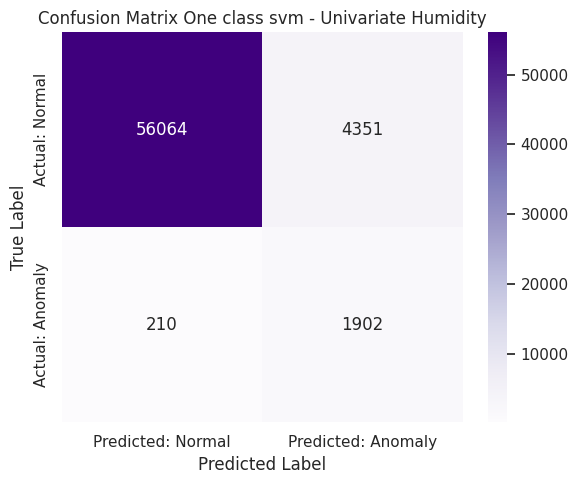


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.93      0.96     60415
   Anomalous       0.30      0.90      0.45      2112

    accuracy                           0.93     62527
   macro avg       0.65      0.91      0.71     62527
weighted avg       0.97      0.93      0.94     62527



In [ ]:
y_true = test_df["Label_Humidity"].values
y_pred_iso = test_anomalies_svm_hum.astype(int)

create_confusion_matrix(y_true, y_pred_iso, "One class svm - Univariate Humidity")

Confusion matrix - One class svm - multi

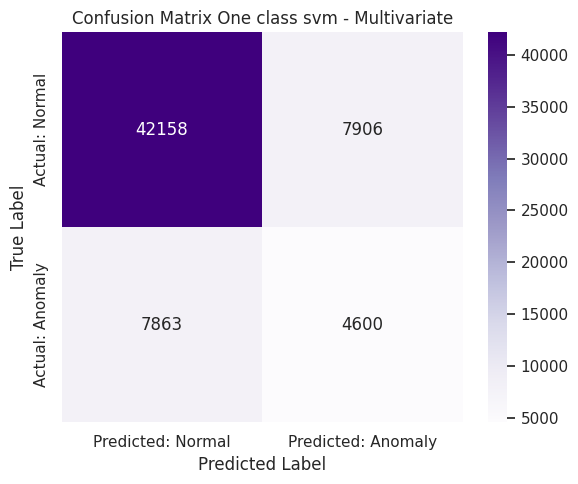


Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.84      0.84     50064
   Anomalous       0.37      0.37      0.37     12463

    accuracy                           0.75     62527
   macro avg       0.61      0.61      0.61     62527
weighted avg       0.75      0.75      0.75     62527



In [ ]:
y_true = test_df["Label_Multivariate"].values
y_pred_iso = test_anomalies_svm_multi.astype(int)

create_confusion_matrix(y_true, y_pred_iso, "One class svm - Multivariate")

Confusion matrix - LSTM AUTOENCODER - Univariate Temperature

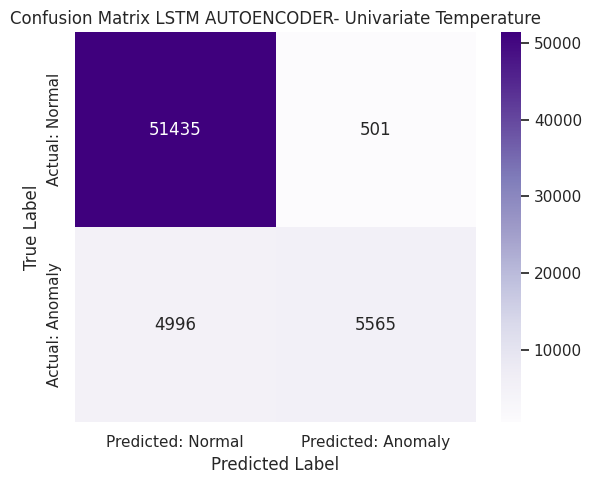


Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.99      0.95     51936
   Anomalous       0.92      0.53      0.67     10561

    accuracy                           0.91     62497
   macro avg       0.91      0.76      0.81     62497
weighted avg       0.91      0.91      0.90     62497



In [ ]:
y_true = test_df["Label_Temperature"].values
y_pred_iso = test_anomalies_lstm_temp.astype(int)

y_true_aligned = y_true[:len(y_pred_iso)]


create_confusion_matrix(y_true_aligned, y_pred_iso, "LSTM AUTOENCODER- Univariate Temperature")

Confusion matrix - LSTM AUTOENCODER - Univariate Humidity

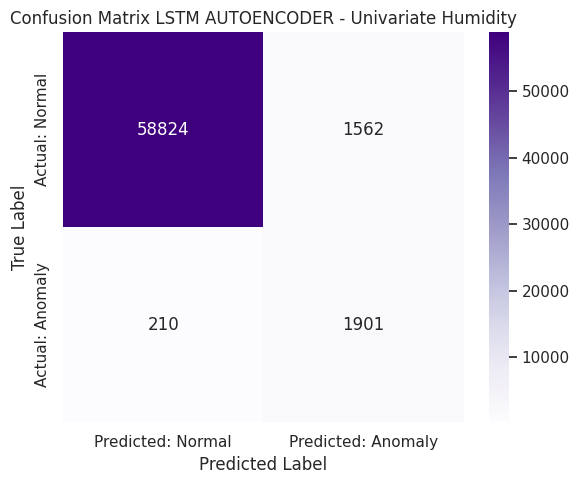


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     60386
   Anomalous       0.55      0.90      0.68      2111

    accuracy                           0.97     62497
   macro avg       0.77      0.94      0.83     62497
weighted avg       0.98      0.97      0.97     62497



In [ ]:
y_true = test_df["Label_Humidity"].values
y_pred_iso = test_anomalies_lstm_hum.astype(int)

y_true_aligned = y_true[:len(y_pred_iso)]
create_confusion_matrix(y_true_aligned, y_pred_iso, "LSTM AUTOENCODER - Univariate Humidity")

Confusion matrix - LSTM AUTOENCODER - MultiVariate

62497


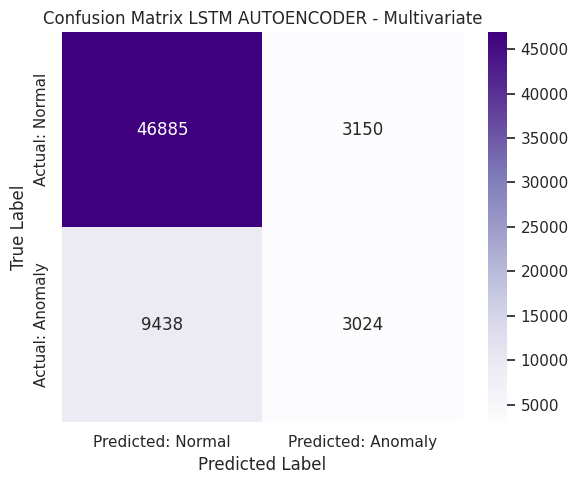


Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      0.94      0.88     50035
   Anomalous       0.49      0.24      0.32     12462

    accuracy                           0.80     62497
   macro avg       0.66      0.59      0.60     62497
weighted avg       0.76      0.80      0.77     62497



In [ ]:
y_true = test_df["Label_Multivariate"].values
y_pred_iso = test_anomalies_lstm.astype(int)
print(len(y_pred_iso))
y_true_aligned = y_true[:len(y_pred_iso)]

create_confusion_matrix(y_true_aligned, y_pred_iso, "LSTM AUTOENCODER - Multivariate")

In [ ]:
# import nixtla library
pip install nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
# instantiate time gpt as client and set up the api key
# the api key is gernerated from using my email

from nixtla import NixtlaClient
timegpt = NixtlaClient(api_key ='nixak-PpaJUEBhTNg6VIlxqIWPCvhgadMqsoJHSCte4srpQwMCsXKQURZd5VqFsW3ZZP0BGB2BoXTEadQVjnLn')
#nixtla_client.validate_api_key()

In [ ]:
test_df[['Temperature']]

Sensor,Temperature
timestamp,
2022-06-11 13:45:00,24.778333
2022-06-11 13:46:00,24.778333
2022-06-11 13:47:00,24.778333
2022-06-11 13:48:00,24.778333
2022-06-11 13:49:00,24.778333
...,...
2022-07-24 23:47:00,21.766666
2022-07-24 23:48:00,21.763333
2022-07-24 23:49:00,21.758333


In [ ]:
# restructure the dataframe according to architechure of TimeGPT model

temp_df_timegpt = test_df[['Temperature']].copy()
temp_df_timegpt = temp_df_timegpt.reset_index()  # moves datetime index to column

temp_df_timegpt['unique_id'] = 'temperature_series'  # assign unique ID

# ensure columns are right
temp_df_timegpt.rename(columns={'timestamp': 'ds', 'Temperature': 'y'}, inplace=True)

temp_df_timegpt = temp_df_timegpt[['unique_id', 'ds', 'y']]  # reorder columns


In [ ]:
#TimeGPT- univariate Temperature
# detect anomalies using detect_anomalies method
#it first forecasts and then detects anomalies using predicted score

# instantiate the models method
temp_anomalies_timegpt = timegpt.detect_anomalies(

    temp_df_timegpt,   # target dataframe
    freq='min',        # Minute-level data
    level=70,          # confidence interval
    time_col='ds',     # timestamp column
    target_col='y'.    # value column
)

In [ ]:
#describe the dataframe
temp_anomalies_timegpt


,unique_id,ds,y,TimeGPT,TimeGPT-hi-70,TimeGPT-lo-70,anomaly
0,temperature_series,2022-06-11 15:52:00,24.778333,24.781654,24.932962,24.630346,False
1,temperature_series,2022-06-11 15:53:00,24.778333,24.780252,24.931560,24.628944,False
2,temperature_series,2022-06-11 15:54:00,24.778333,24.779108,24.930416,24.627800,False
3,temperature_series,2022-06-11 15:55:00,24.778333,24.778263,24.929571,24.626955,False
4,temperature_series,2022-06-11 15:56:00,24.778333,24.777542,24.928850,24.626234,False
...,...,...,...,...,...,...,...
62395,temperature_series,2022-07-24 23:47:00,21.766666,21.784430,21.935738,21.633121,False
62396,temperature_series,2022-07-24 23:48:00,21.763333,21.784975,21.936283,21.633667,False
62397,temperature_series,2022-07-24 23:49:00,21.758333,21.785257,21.936565,21.633950,False
62398,temperature_series,2022-07-24 23:50:00,21.754999,21.785925,21.937233,21.634617,False


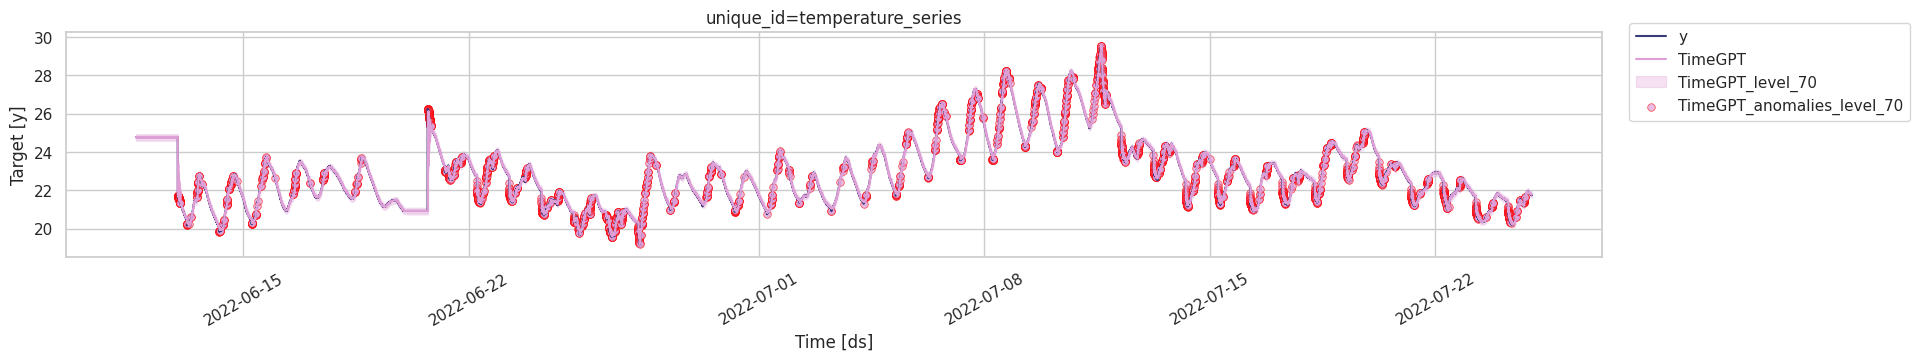

In [ ]:
# plot anomalies for unnivariate temp
timegpt.plot(temp_df_timegpt,temp_anomalies_timegpt)


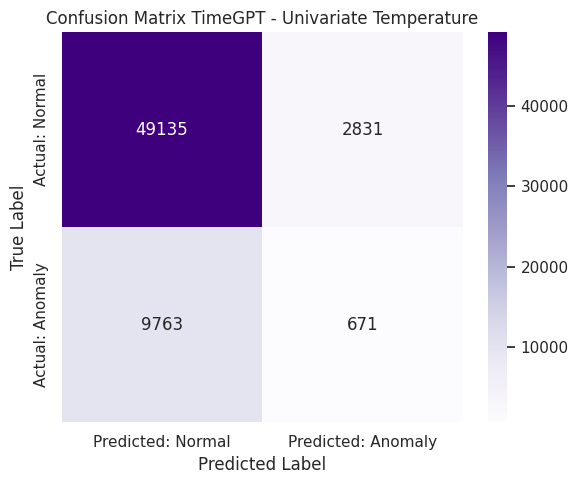


Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      0.95      0.89     51966
   Anomalous       0.19      0.06      0.10     10434

    accuracy                           0.80     62400
   macro avg       0.51      0.50      0.49     62400
weighted avg       0.73      0.80      0.75     62400



In [ ]:
# create confusion matrix for univariate data - timegpt

y_true_timegpt_temp = test_df["Label_Temperature"].values[127:]

y_pred_timegpt_temp = temp_anomalies_timegpt['anomaly'].astype(int)

create_confusion_matrix(y_true_timegpt_temp , y_pred_timegpt_temp, "TimeGPT - Univariate Temperature")

In [ ]:
# restructure the dataframe according to architechure of TimeGPT model

hum_df = test_df[['Humidity']].copy()
hum_df = hum_df.reset_index()  # moves datetime index to column

hum_df['unique_id'] = 'humidity_series'  # assign unique ID
hum_df.rename(columns={'timestamp': 'ds', 'Humidity': 'y'}, inplace=True)  # ensure columns are right

hum_df = hum_df[['unique_id', 'ds', 'y']]  # reorder columns
hum_df

Sensor,unique_id,ds,y
0,humidity_series,2022-06-11 13:45:00,42.140500
1,humidity_series,2022-06-11 13:46:00,42.140500
2,humidity_series,2022-06-11 13:47:00,42.140500
3,humidity_series,2022-06-11 13:48:00,42.140500
4,humidity_series,2022-06-11 13:49:00,42.140500
...,...,...,...
62522,humidity_series,2022-07-24 23:47:00,59.919000
62523,humidity_series,2022-07-24 23:48:00,59.941833
62524,humidity_series,2022-07-24 23:49:00,59.948500
62525,humidity_series,2022-07-24 23:50:00,59.969500


In [ ]:
#TimeGPT- univariate Humididty
# detect anomalies using detect_anomalies method
#it first forecasts and then detects anomalies using predicted score

# instantiate the models method

hum_anomalies = timegpt.detect_anomalies(
    hum_df,
    freq='min',  # Minute-level data
    level=90,    # confidence interval
    time_col='ds',
    target_col='y'
)

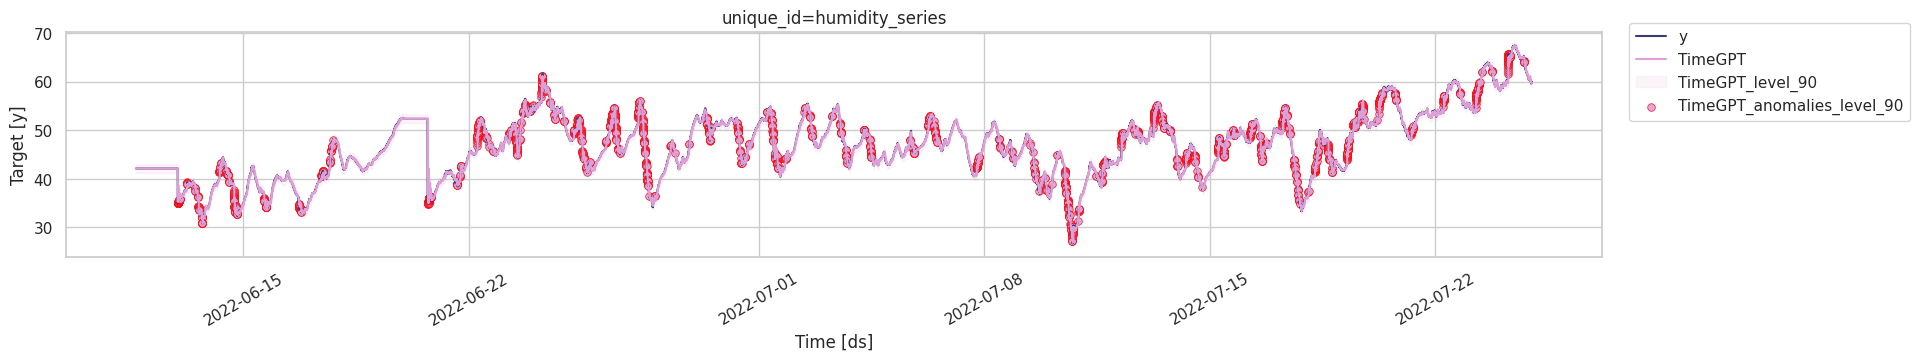

In [ ]:
#plot anomalies against real datset

timegpt.plot(hum_df,hum_anomalies)

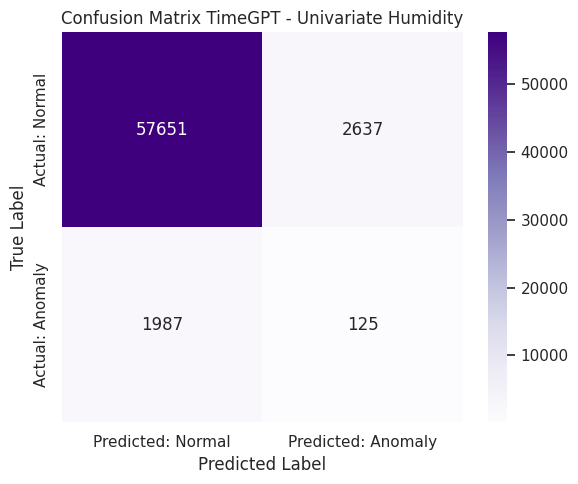


Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.96      0.96     60288
   Anomalous       0.05      0.06      0.05      2112

    accuracy                           0.93     62400
   macro avg       0.51      0.51      0.51     62400
weighted avg       0.94      0.93      0.93     62400



In [ ]:
# confusion matrix of timegpt - univariate humidty

y_true_timegpt_hum = test_df["Label_Humidity"].values[127:]

y_pred_timegpt_hum = hum_anomalies['anomaly'].astype(int)

create_confusion_matrix(y_true_timegpt_hum , y_pred_timegpt_hum, "TimeGPT - Univariate Humidity")

In [ ]:
# restructure the dataframe according to architechure of TimeGPT model

# Select and reshape the data - using the same column names as your univariate case
multivariate_df = test_df[['Temperature', 'Humidity']].copy()
multivariate_df = multivariate_df.reset_index()  # This moves the datetime index to a column

multivariate_df['unique_id'] = 'multi_series'  # assign unique ID
multivariate_df.rename(columns={'timestamp': 'ds', 'Temperature':'y1', 'Humidity':'y2'}, inplace=True)  # ensure columns are right
multivariate_df

Sensor,ds,y1,y2,unique_id
0,2022-06-11 13:45:00,24.778333,42.140500,multi_series
1,2022-06-11 13:46:00,24.778333,42.140500,multi_series
2,2022-06-11 13:47:00,24.778333,42.140500,multi_series
3,2022-06-11 13:48:00,24.778333,42.140500,multi_series
4,2022-06-11 13:49:00,24.778333,42.140500,multi_series
...,...,...,...,...
62522,2022-07-24 23:47:00,21.766666,59.919000,multi_series
62523,2022-07-24 23:48:00,21.763333,59.941833,multi_series
62524,2022-07-24 23:49:00,21.758333,59.948500,multi_series
62525,2022-07-24 23:50:00,21.754999,59.969500,multi_series


In [ ]:
# combine univariate datsets for multivariate data -

df_long = (
    multivariate_df
    .melt(
        id_vars=['ds'],
        value_vars=['y1','y2'],
        var_name='unique_id',
        value_name='y'
    )
)
df_long

,ds,unique_id,y
0,2022-06-11 13:45:00,y1,24.778333
1,2022-06-11 13:46:00,y1,24.778333
2,2022-06-11 13:47:00,y1,24.778333
3,2022-06-11 13:48:00,y1,24.778333
4,2022-06-11 13:49:00,y1,24.778333
...,...,...,...
125049,2022-07-24 23:47:00,y2,59.919000
125050,2022-07-24 23:48:00,y2,59.941833
125051,2022-07-24 23:49:00,y2,59.948500
125052,2022-07-24 23:50:00,y2,59.969500


In [ ]:
#TimeGPT- multivariate data

# detect anomalies using detect_anomalies method
#it first forecasts and then detects anomalies using predicted score

# instantiate the models method
anom_long = timegpt.detect_anomalies(
    df_long,
    freq='min',          # minute-level
    level=70,
    time_col='ds',
    id_col='unique_id',   # now use the 'series' column to distinguish
    target_col='y',
)

In [ ]:
#describe the dataframe
anom_long

,unique_id,ds,y,TimeGPT,TimeGPT-hi-70,TimeGPT-lo-70,anomaly
0,y1,2022-06-11 15:52:00,24.778333,24.781654,24.932962,24.630346,False
1,y1,2022-06-11 15:53:00,24.778333,24.780252,24.931560,24.628944,False
2,y1,2022-06-11 15:54:00,24.778333,24.779108,24.930416,24.627800,False
3,y1,2022-06-11 15:55:00,24.778333,24.778263,24.929571,24.626955,False
4,y1,2022-06-11 15:56:00,24.778333,24.777542,24.928850,24.626234,False
...,...,...,...,...,...,...,...
124795,y2,2022-07-24 23:47:00,59.919000,59.701256,60.242546,59.159966,False
124796,y2,2022-07-24 23:48:00,59.941833,59.708916,60.250206,59.167625,False
124797,y2,2022-07-24 23:49:00,59.948500,59.715317,60.256607,59.174026,False
124798,y2,2022-07-24 23:50:00,59.969500,59.720127,60.261417,59.178837,False


In [ ]:
joint_anomalies = anom_long.groupby('ds')['anomaly'].any().reset_index()
#joint_anomalies = joint_anomalies[joint_anomalies['anomaly'] == True]

In [ ]:
joint_anomalies

,ds,anomaly
0,2022-06-11 15:52:00,False
1,2022-06-11 15:53:00,False
2,2022-06-11 15:54:00,False
3,2022-06-11 15:55:00,False
4,2022-06-11 15:56:00,False
...,...,...
62395,2022-07-24 23:47:00,False
62396,2022-07-24 23:48:00,False
62397,2022-07-24 23:49:00,False
62398,2022-07-24 23:50:00,False


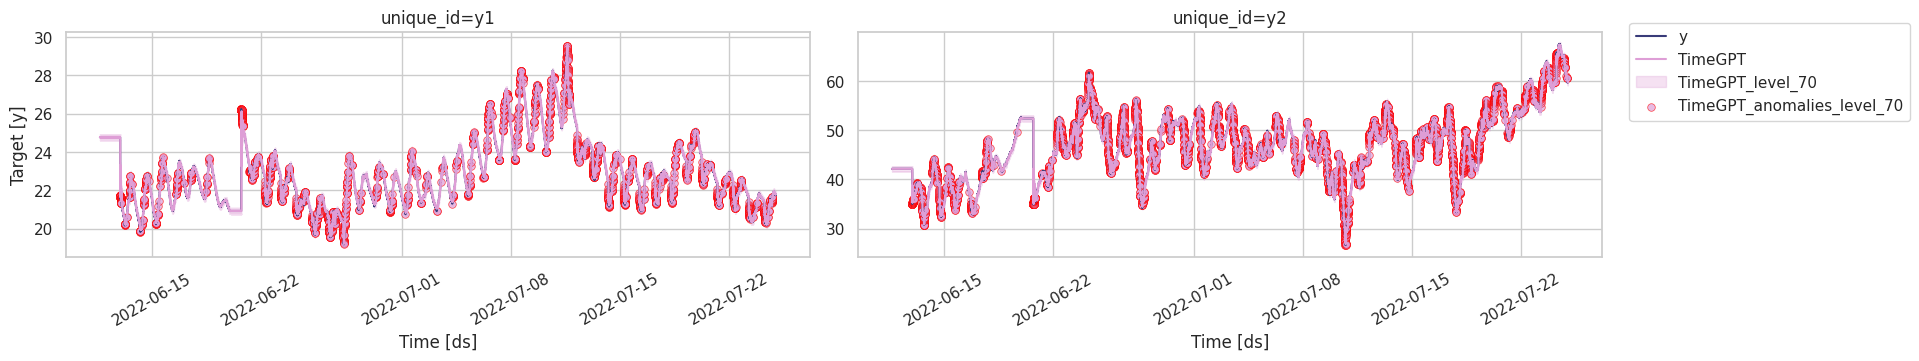

In [ ]:
# plot joint anomailes for multivariate datset
timegpt.plot(df_long,anom_long)

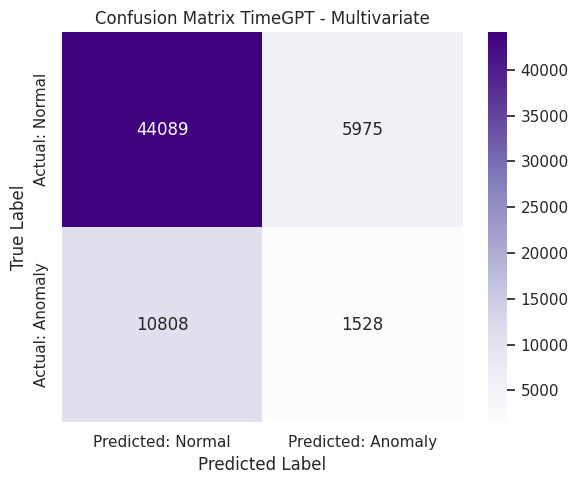


Classification Report:
              precision    recall  f1-score   support

      Normal       0.80      0.88      0.84     50064
   Anomalous       0.20      0.12      0.15     12336

    accuracy                           0.73     62400
   macro avg       0.50      0.50      0.50     62400
weighted avg       0.68      0.73      0.70     62400



In [ ]:
# create confusion matrix for multivariate data
y_true_timegpt_multi = test_df["Label_Multivariate"].values[127:]

y_pred_timegpt_multi = joint_anomalies['anomaly'].astype(int)

create_confusion_matrix(y_true_timegpt_multi , y_pred_timegpt_multi, "TimeGPT - Multivariate")